In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
x = boston.data
y = boston.target

In [10]:
x.shape,y.shape

((506, 13), (506,))

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=87)

In [14]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [15]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

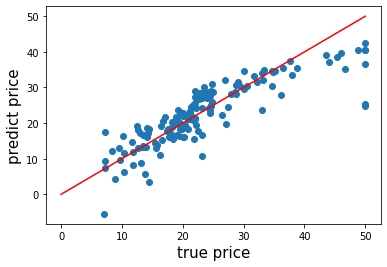

In [24]:
plt.scatter(y_test,regr.predict(x_test))
plt.xlabel('true price',fontsize=15)
plt.ylabel('predict price',fontsize=15)
plt.plot([0,50],[0,50],'r')

In [25]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
x.shape

(506, 13)

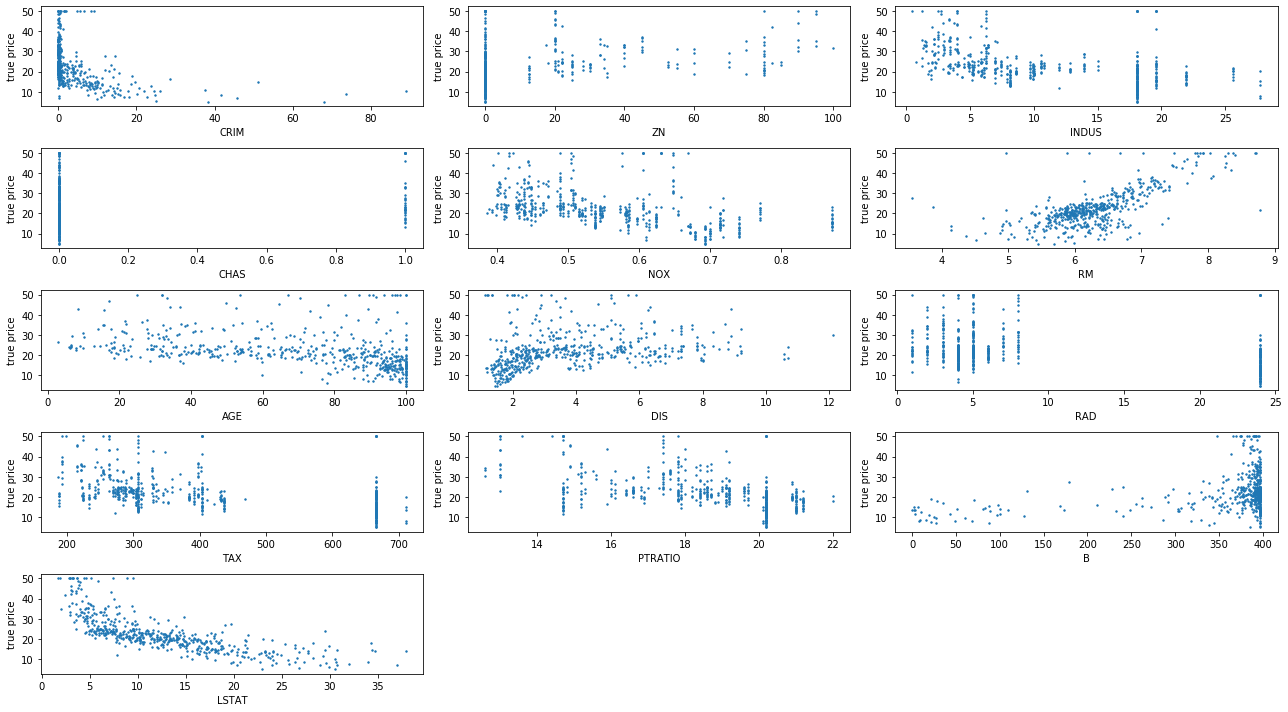

In [37]:
plt.figure(figsize = (18,10))

for i,feature in enumerate(boston.feature_names):
    plt.subplot(5,3,i+1)
    plt.scatter(x[:,i],y,s=2)
    plt.xlabel(feature)
    plt.ylabel('true price')
    plt.tight_layout()

In [39]:
x1 = np.array([[-3,2],[-6,5],[3,-4],[2,-8],[5,5]])
y1 = np.array([1,1,2,2,1])

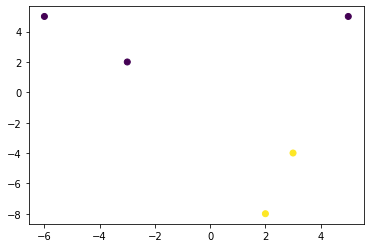

In [43]:
plt.scatter(x1[:,0],x1[:,1],c=y1)

In [45]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x1,y1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
clf.predict(x1)

array([1, 1, 2, 2, 1])

In [55]:
clf.predict(x1[0].reshape(1,2))

array([1])

In [56]:
regr.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
regr.predict(x1)

array([1.18031794, 0.87869483, 1.78356416, 2.10822836, 1.04919471])

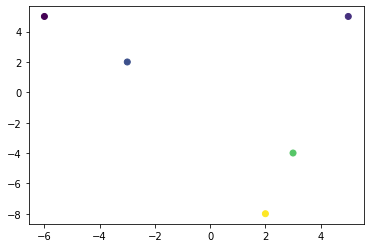

In [67]:
plt.scatter(x1[:,0],x1[:,1],c=regr.predict(x1))

In [68]:
x_min,x_max,y_min,y_max = (-6,3,-8,5)

xx = np.linspace(x_min,x_max,x_max-x_min+1)
yy = np.linspace(y_min,y_max,y_max-y_min+1)

xc,yc = np.meshgrid(xx,yy)

In [71]:
xc = xc.ravel()
yc = yc.ravel()

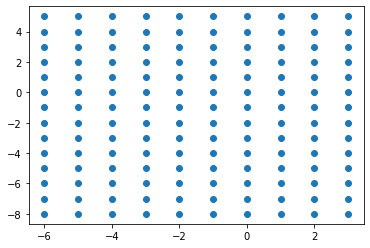

In [72]:
plt.scatter(xc,yc)

In [84]:
new_x = np.array(list(zip(xc,yc)))

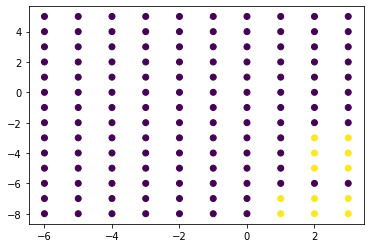

In [87]:
new_predict = clf.predict(new_x)

plt.scatter(new_x[:,0],new_x[:,1],c=new_predict)

In [88]:
from sklearn.datasets import load_iris

iris = load_iris()

In [92]:
x_iris = iris.data
y_iris = iris.target

In [94]:
outcome = clf.fit(x_iris,y_iris)

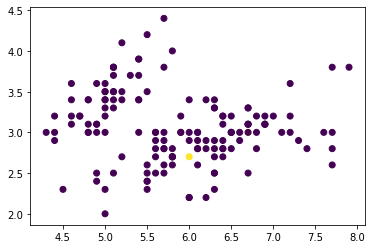

In [96]:
plt.scatter(x_iris[:,0],x_iris[:,1],c=clf.predict(x_iris)-y_iris)

In [103]:
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=2)

In [104]:
x1

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8],
       [ 5,  5]])

In [105]:
k_cluster.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'SVM')

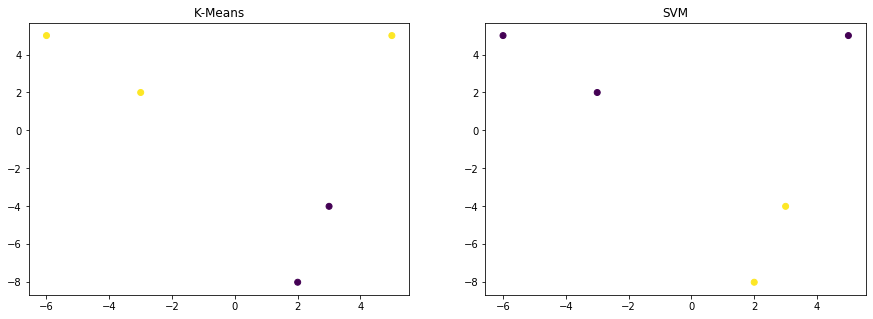

In [116]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x1[:,0],x1[:,1],c=k_cluster.labels_)
plt.title('K-Means')

plt.subplot(1,2,2)
plt.scatter(x1[:,0],x1[:,1],c=clf.predict(x1))
plt.title('SVM')

In [111]:
clf.fit(x1,y1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
clf.predict(x1)

array([1, 1, 2, 2, 1])

In [117]:
x1.shape

(5, 2)